In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [5]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    mask_india = df["ADDRESS"].str.contains("Mumbai")
    mask_bhk = df["BHK_OR_RK"] == "BHK"
    mask_price = df["TARGET(PRICE_IN_LACS)"] < 1_000
    
    df = df[mask_india & mask_bhk & mask_price]
    
    return df

In [33]:
df = wrangle("/home/d3lia/Development/DataScience/House Price Prediction in India/Jupyter/Participants_Data_HPP/Train.csv")
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
23,Dealer,0,0,1,BHK,630.000630,1,1,"Bandra (West),Mumbai",19.054440,72.840560,300.0
43,Dealer,0,1,3,BHK,1274.924779,1,1,"Marol,Mumbai",22.803593,83.755013,250.0
66,Dealer,0,1,3,BHK,1038.883942,1,1,"Powai,Mumbai",19.120000,72.910000,280.0
84,Dealer,0,1,2,BHK,1004.932182,1,1,"New Panvel,Mumbai",18.966114,73.148278,81.5
131,Dealer,0,1,2,BHK,1294.016156,1,1,"4 Bunglows,Mumbai",19.128324,72.825408,330.0


Text(0.5, 1.0, 'Distribution of BHK Prices')

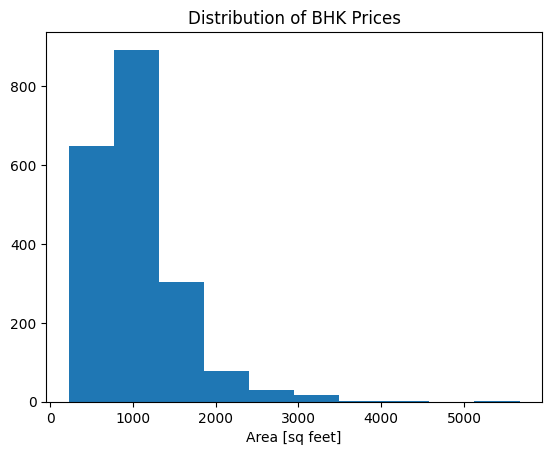

In [10]:
plt.hist(df["SQUARE_FT"])
plt.xlabel("Area [sq feet]")
plt.title("Distribution of BHK Prices")

In [11]:
df.describe()["SQUARE_FT"]

count    1978.000000
mean     1063.460944
std       516.203018
min       225.004536
25%       683.400048
50%      1000.000000
75%      1250.000000
max      5670.578927
Name: SQUARE_FT, dtype: float64

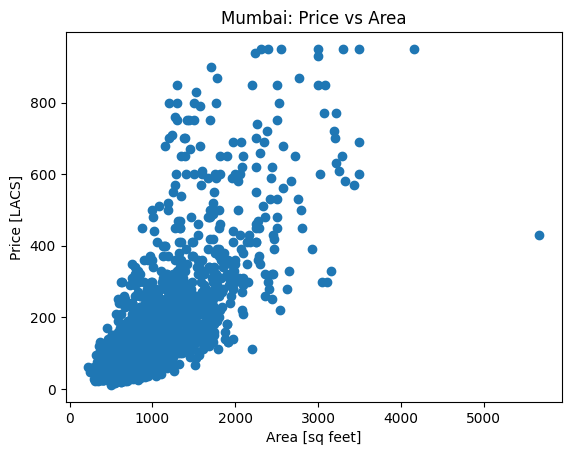

In [13]:
plt.scatter(x=df["SQUARE_FT"], y=df["TARGET(PRICE_IN_LACS)"])
plt.xlabel("Area [sq feet]")
plt.ylabel("Price [LACS]")
plt.title("Mumbai: Price vs Area");

In [14]:
correlation = df["SQUARE_FT"].corr(df["TARGET(PRICE_IN_LACS)"])
print(correlation)

0.7163781008635076


In [16]:
feature = ["SQUARE_FT"]
X_train = df[feature]
X_train.shape

(1978, 1)

In [17]:
target = "TARGET(PRICE_IN_LACS)"
y_train = df[target]
y_train.shape

(1978,)

In [21]:
y_mean = y_train.mean()
y_mean

170.5484833164813

In [23]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[170.5484833164813,
 170.5484833164813,
 170.5484833164813,
 170.5484833164813,
 170.5484833164813]

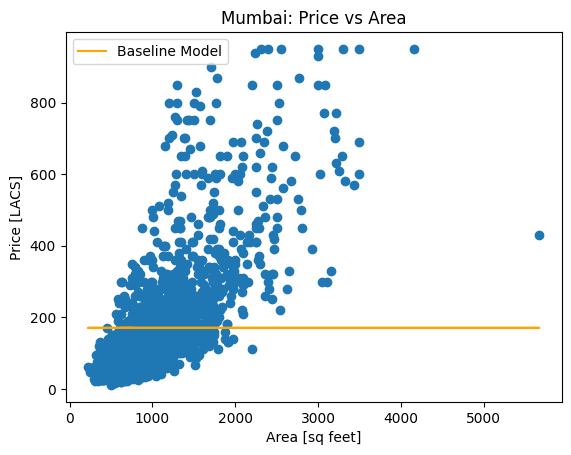

In [24]:
plt.plot(X_train.values, y_pred_baseline, color="orange", label="Baseline Model")
plt.scatter(X_train.values, y_train)
plt.xlabel("Area [sq feet]")
plt.ylabel("Price [LACS]")
plt.title("Mumbai: Price vs Area")
plt.legend();

In [25]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean BHK Price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean BHK Price 170.55
Baseline MAE: 104.9


In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([ 77.79964619, 215.7960508 , 165.2896666 , 158.02490404,
       219.88109148])

In [29]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 70.93


In [41]:
X_test = pd.read_csv("/home/d3lia/Development/DataScience/House Price Prediction in India/Jupyter/Participants_Data_HPP/Test.csv")[feature]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0     59.648462
1    114.174934
2    211.981282
3    242.629282
4     35.107139
dtype: float64

In [42]:
intercept = round(model.intercept_, 2)
print("Mean Intercept:", intercept)

Mean Intercept: -57.0


In [44]:
coefficient = round(model.coef_[0], 2)
print("Mean Coefficient:", coefficient)

Mean Coefficient: 0.21


In [48]:
print(f"bhk_price = {intercept} + {coefficient} * SQUARE_FT")

bhk_price = -57.0 + 0.21 * SQUARE_FT


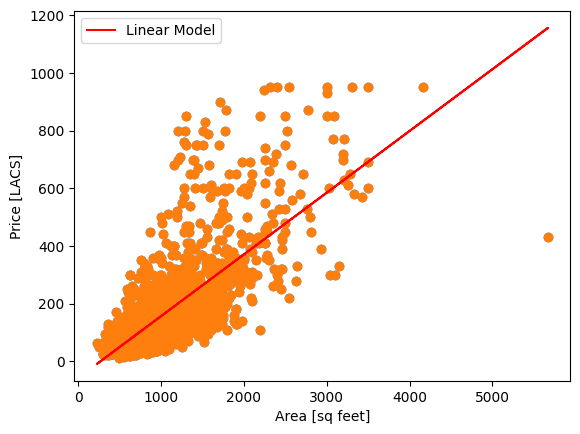

In [49]:
plt.plot(X_train.values, model.predict(X_train), color="r", label="Linear Model")
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq feet]")
plt.ylabel("Price [LACS]")
plt.legend();

In [57]:
import csv

header = ['SQUARE_FT', 'PRICE(LACS)']
rows = X_train.values, model.predict(X_train)

with open("/home/d3lia/Development/DataScience/House Price Prediction in India/Jupyter/Participants_Data_HPP/predictions.csv", 'w', encoding="utf-8", newline='') as df:
    writer = csv.writer(df)
    writer.writerow(header)
    writer.writerow(rows)